In [1]:
%matplotlib inline
import camelot
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

plt.style.use('scottoplot')
%config InlineBackend.figure_format = 'retina'

In [2]:
# determine coordinates by running (from CLI):
#   camelot stream -plot text MWRAData20201111-NSdata.pdf
tables = camelot.read_pdf('data/mwra.com/MWRAData20201111-NSdata.pdf', flavor='stream', edge_tol=1500, columns=['118,208,274,325'], pages='all')

In [3]:
# Assemble them into one dataframe
df = pd.DataFrame()
for t in tables:
    df = df.append(t.df)

In [4]:
df.head(5)

0            1            2         3         4
0                                         Southern  Northern
1                  Southern     Northern  7 sample  7 sample
2  Sample Date  (copies/mL)  (copies/mL)       avg       avg
3     3/3/2020                         7                    
4     3/6/2020                        12

In [5]:
df.rename(inplace=True, columns={0:'date', 1:'southern_copies', 2:'northern_copies', 3:'southern_avg', 4:'northern_avg'})
df.drop(df.index[[0,1,2]], inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['southern_copies'] = pd.to_numeric(df['southern_copies'])
df['northern_copies'] = pd.to_numeric(df['northern_copies'])

In [41]:
df = df.set_index('date')

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.2)


Text(0.5, 1.0, 'MASSACHUSETTS WATER RESOURCES AUTHORITY\nVIRAL RNA LEVELS IN SEWAGE')

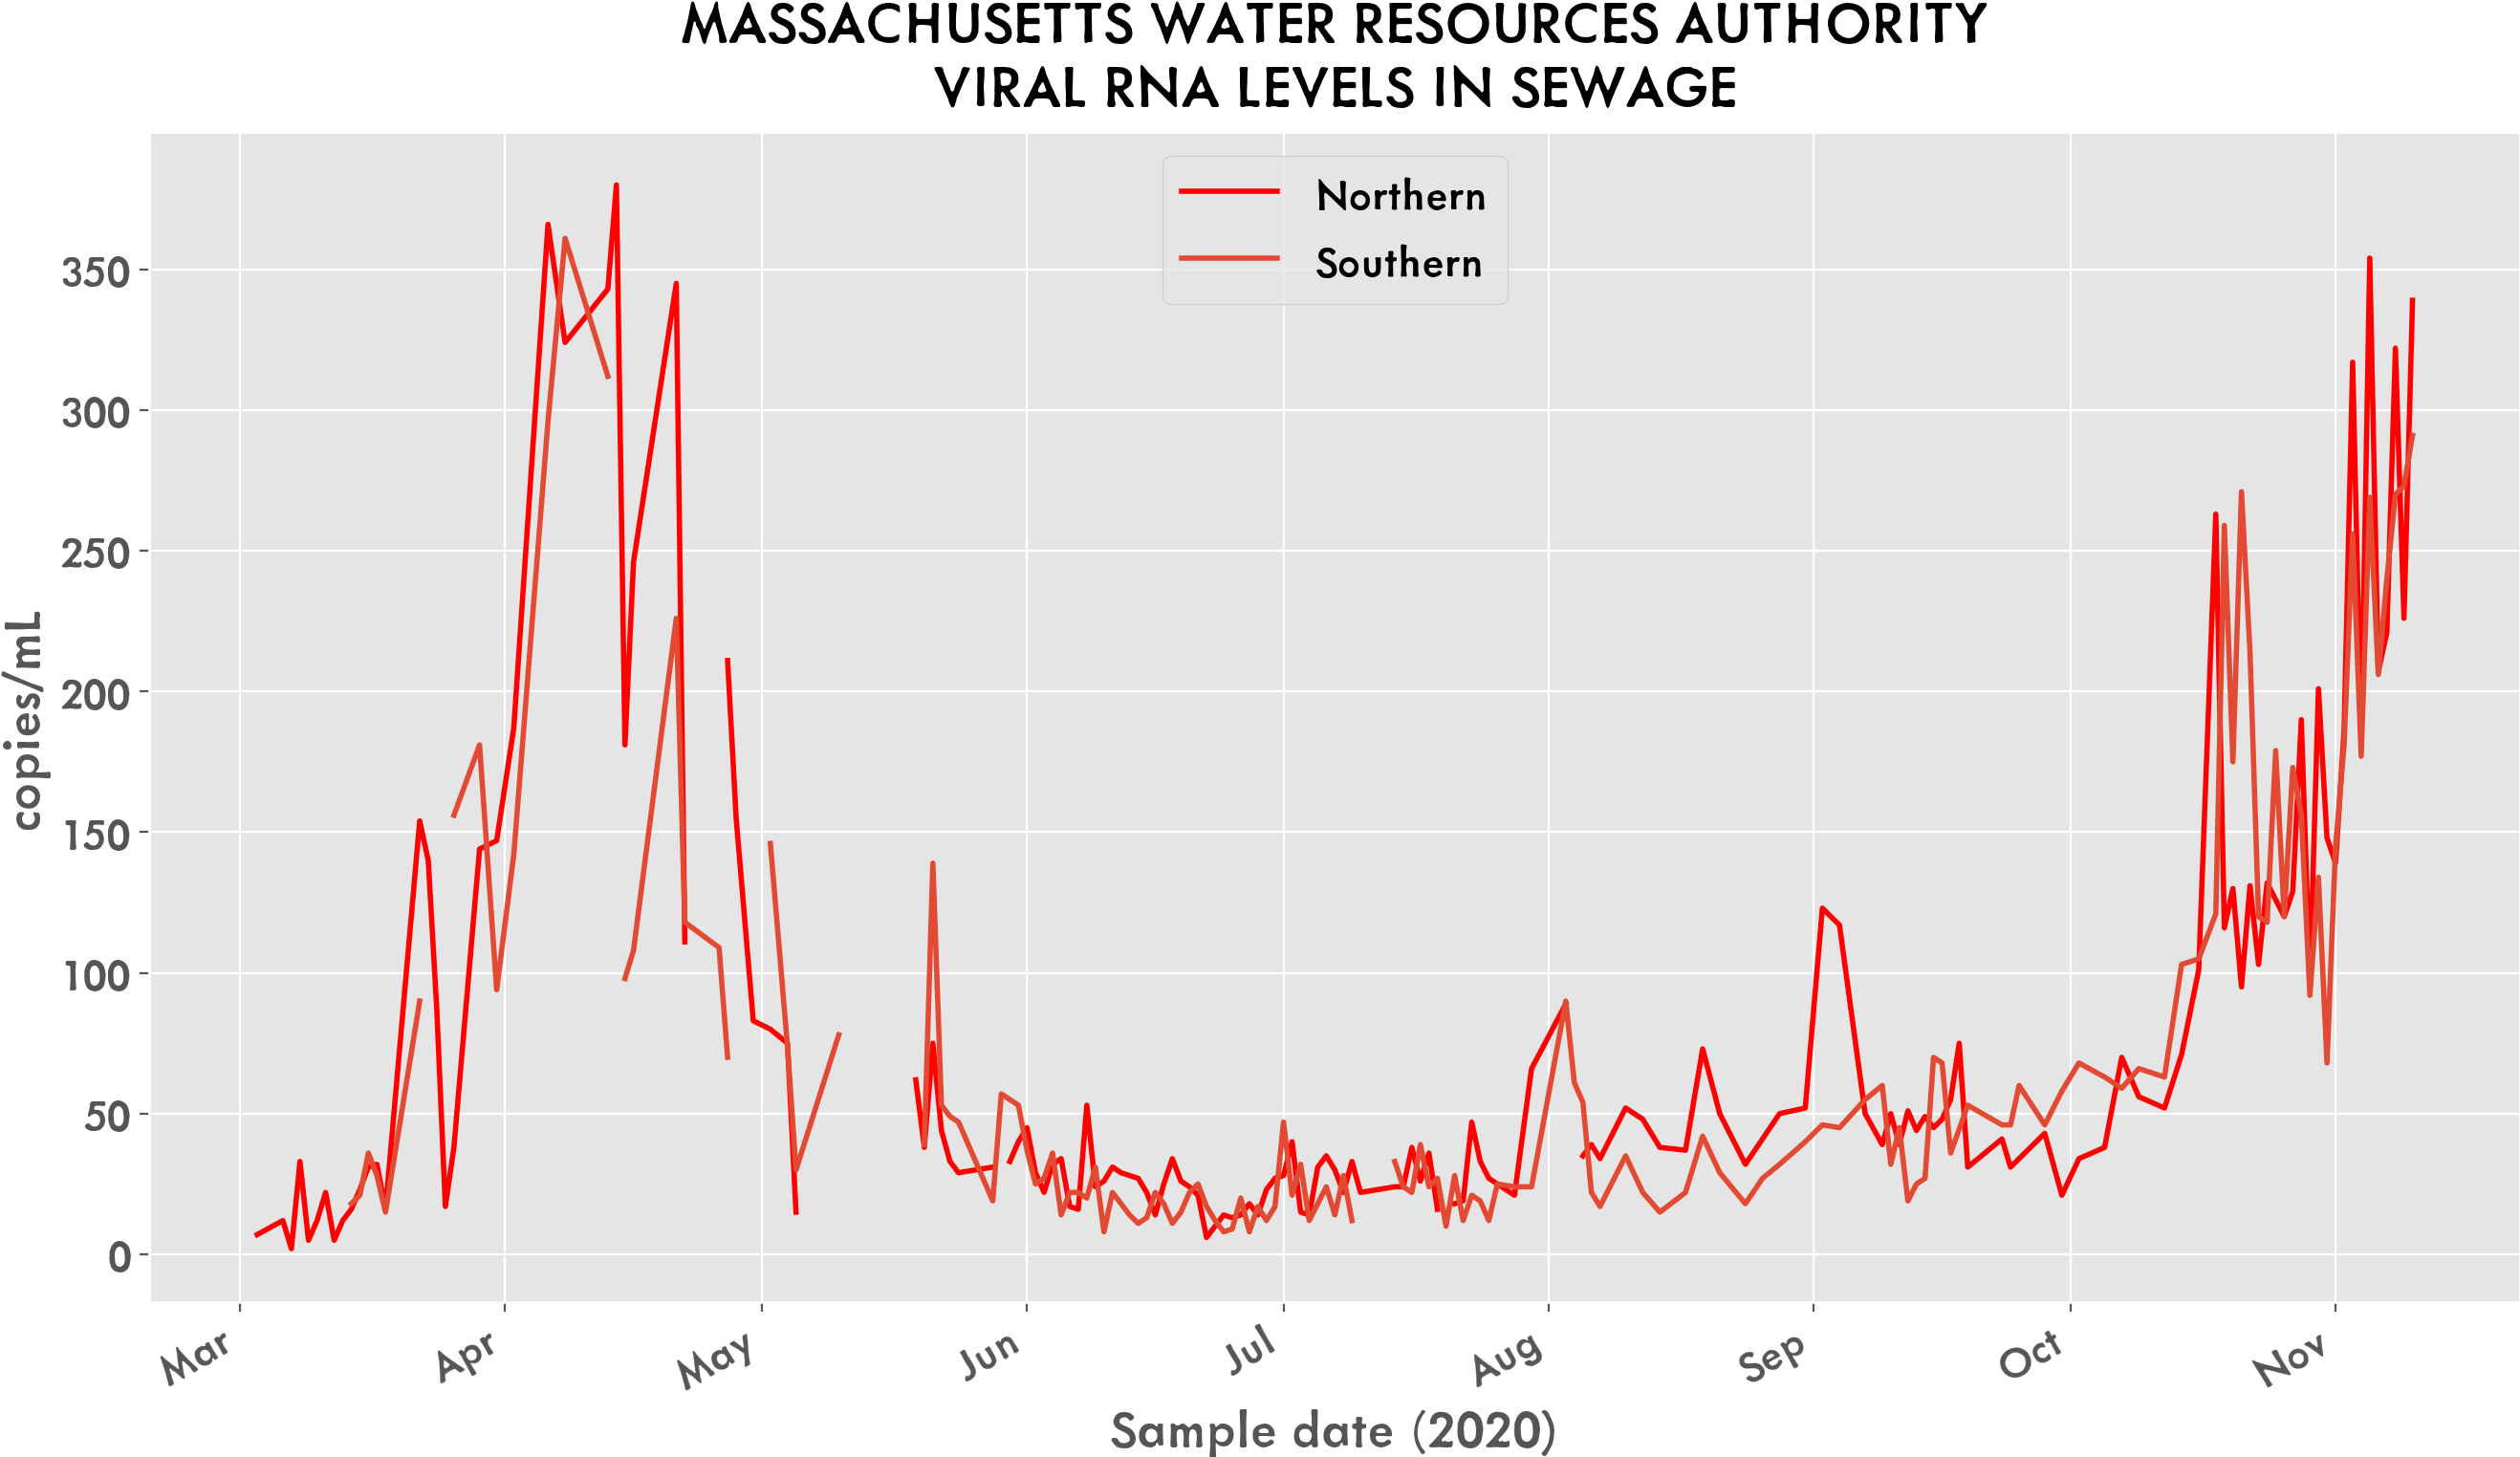

In [44]:
fig, ax = plt.subplots(figsize=(16,9))
df.plot(ax=ax, y='northern_copies', color='r', label="Northern")
df.plot(ax=ax, y='southern_copies', label="Southern")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
ax.set_xlabel("Sample date (2020)")
ax.set_ylabel("copies/mL")
plt.legend(loc="upper center")
plt.title("Massachusetts Water Resources Authority\nViral RNA Levels in Sewage".upper())

In [8]:
import zipfile

In [9]:
archive = zipfile.ZipFile('data/mass.gov/covid-19-dashboard_11-14-2020.zip', 'r')

In [12]:
xlfile = archive.open('Hospitalization from Hospitals.xlsx')

In [36]:
df_hosp = pd.read_excel(xlfile)
df_hosp = df_hosp.set_index('Date')

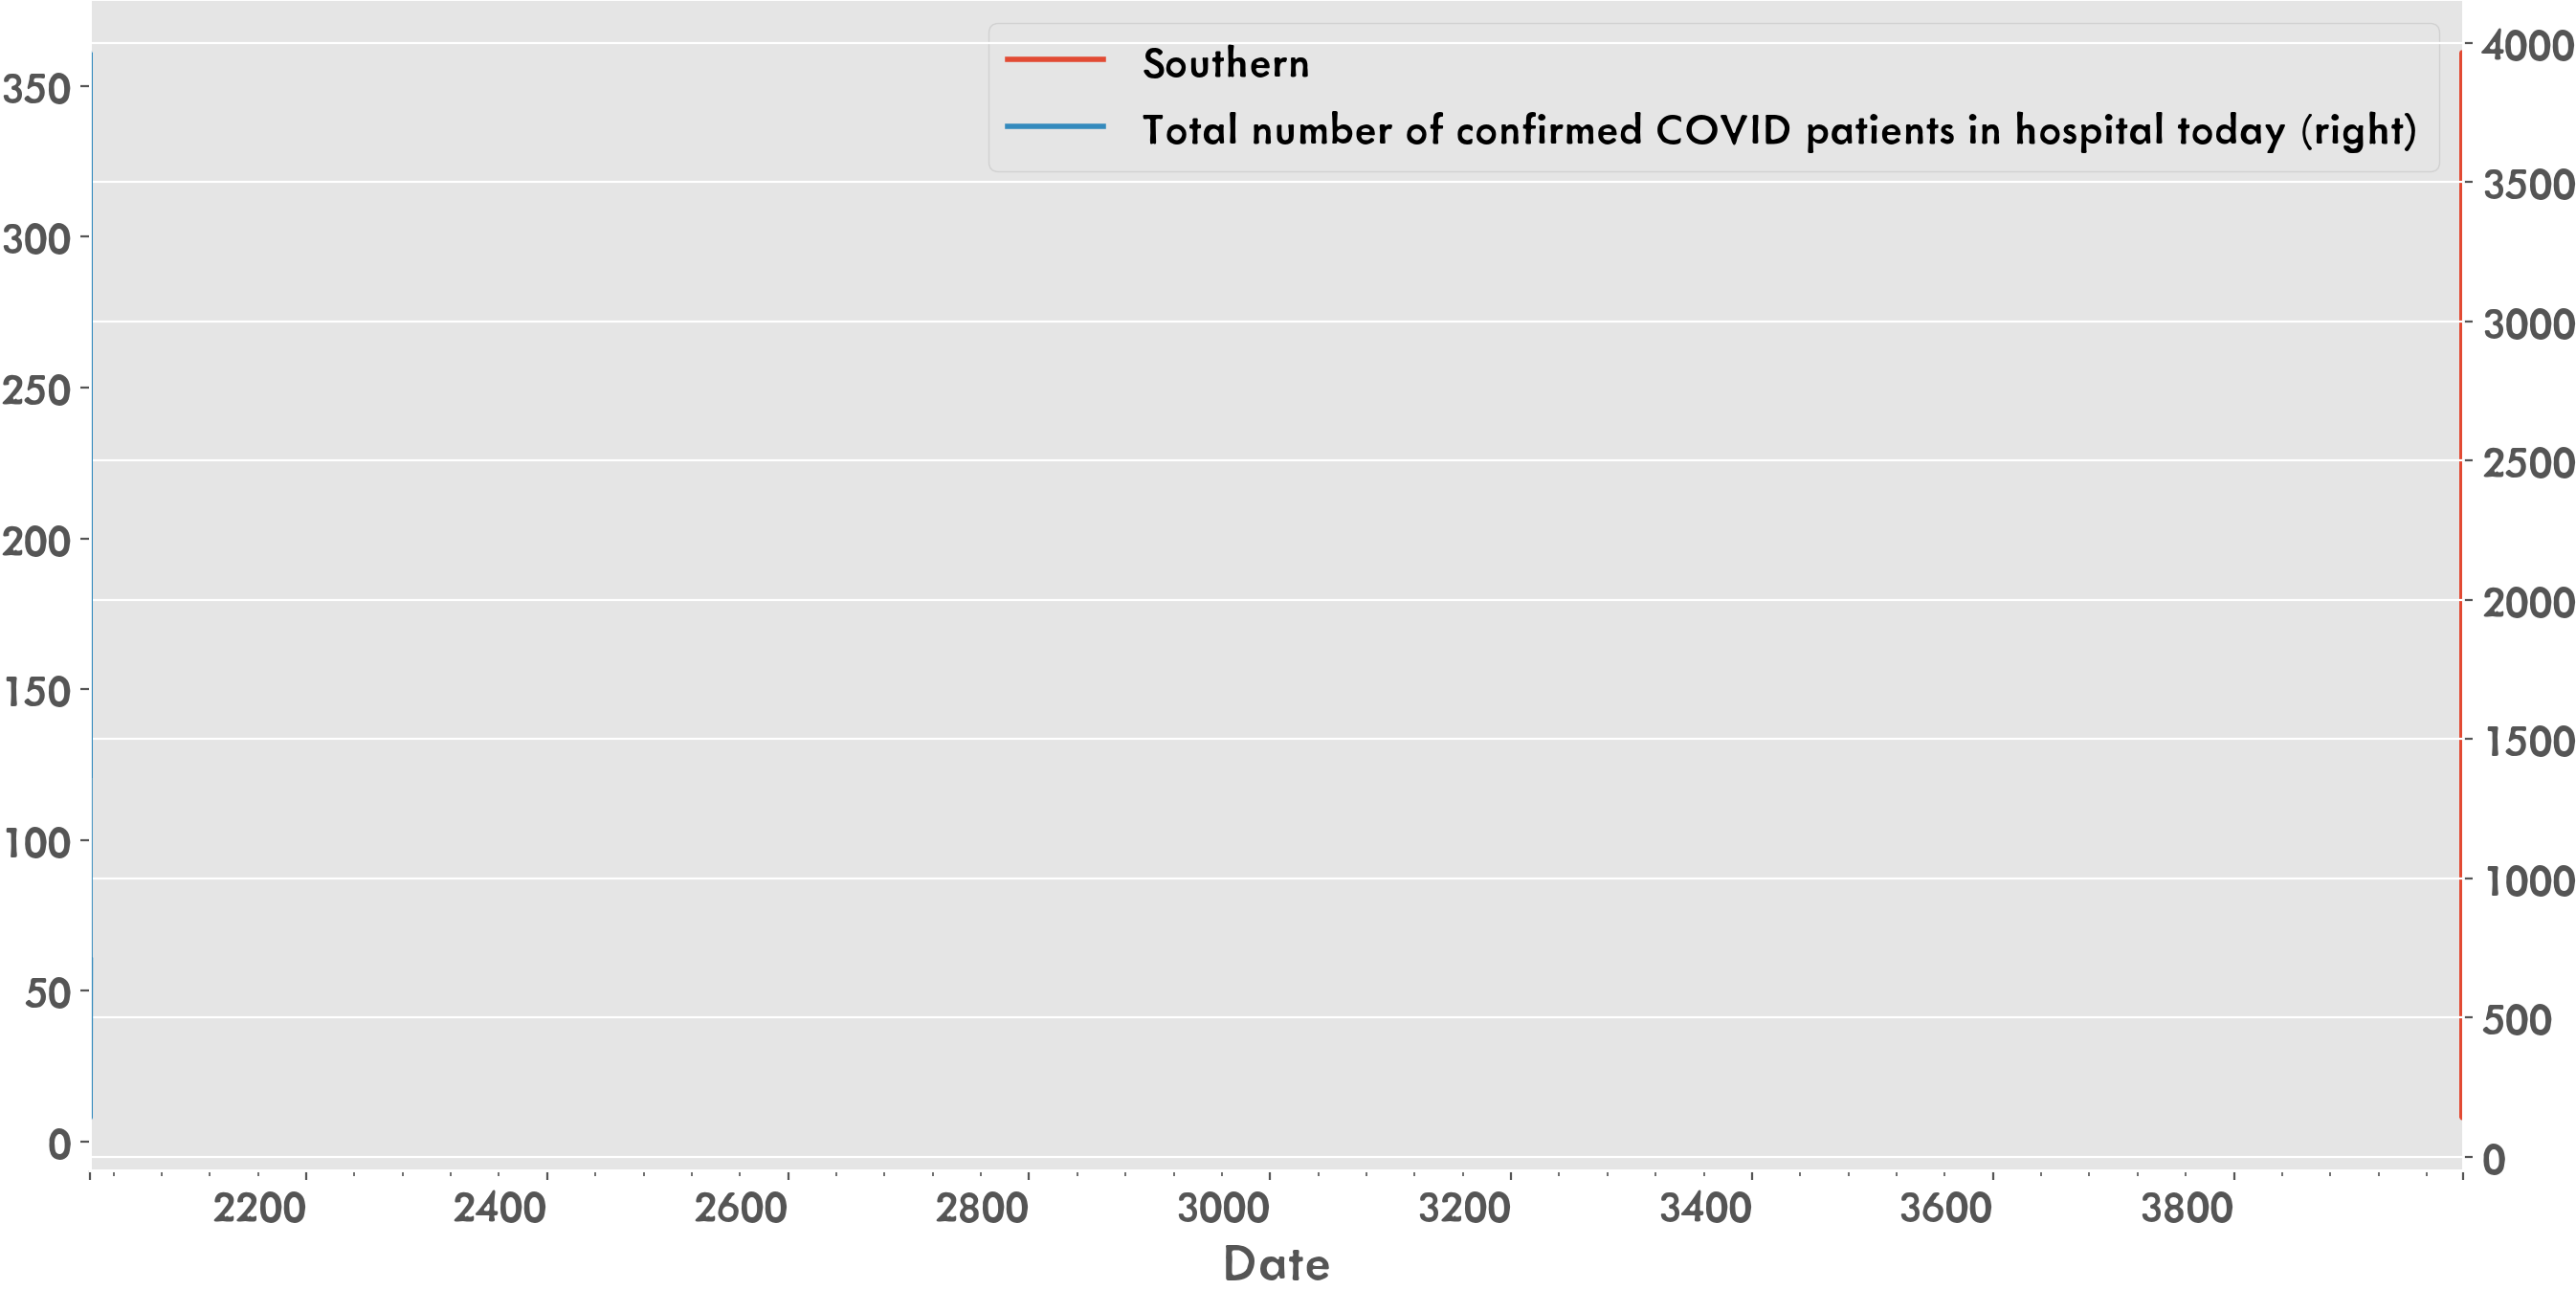

In [49]:
fig, ax = plt.subplots(figsize=(16,9))
#df.plot(ax=ax, x='date', y='northern_copies', color='r', label="Northern")
df.plot(ax=ax, y='southern_copies', label="Southern")
ax2 = df_hosp.plot(ax=ax, secondary_y=True, y='Total number of confirmed COVID patients in hospital today')
#ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
#ax.set_xlabel("Sample date (2020)")
#ax.set_ylabel("copies/mL")
#plt.legend(loc="upper center")
#plt.title("Massachusetts Water Resources Authority\nViral RNA Levels in Sewage".upper())

Total number of confirmed COVID patients in hospital today  \
Date                                                                     
2020-04-04                                               1370            
2020-04-05                                               1632            
2020-04-06                                               1677            
2020-04-07                                               1831            
2020-04-08                                               2119            
...                                                       ...            
2020-11-09                                                618            
2020-11-10                                                659            
2020-11-11                                                661            
2020-11-12                                                687            
2020-11-13                                                705            

            Net new number of confirmed COVID patients in hospital today  \
Date                                                                       
2020-04-04                                                NaN              
2020-04-05                                              262.0              
2020-04-06                                               45.0              
2020-04-07                                              154.0              
2020-04-08                                              288.0              
...                                                       ...              
2020-11-09                                               30.0              
2020-11-10                                               41.0              
2020-11-11                                                2.0              
2020-11-12                                               26.0              
2020-11-13                                               18.0              

            7 day average of confirmed COVID hospitalizations  Confirmed ICU  \
Date                                                                           
2020-04-04                                                NaN            438   
2020-04-05                                                NaN            526   
2020-04-06                                                NaN            542   
2020-04-07                                                NaN            575   
2020-04-08                                                NaN            659   
...                                                       ...            ...   
2020-11-09                                         546.000000            150   
2020-11-10                                         568.428571            152   
2020-11-11                                         591.714286            151   
2020-11-12                                         616.571429            153   
2020-11-13                                         640.857143            151   

            Net New number ICU  Confirmed intubated  Net New number intubated  
Date                                                                           
2020-04-04                 242                  NaN                       NaN  
2020-04-05                  88                  NaN                       NaN  
2020-04-06                  16                  NaN                       NaN  
2020-04-07                  33                  NaN                       NaN  
2020-04-08                  84                  NaN                       NaN  
...                        ...                  ...                       ...  
2020-11-09                   7                 68.0                       2.0  
2020-11-10                   2                 72.0                       4.0  
2020-11-11                  -1                 68.0                      -4.0  
2020-11-12                   2                 71.0                       3.0  
2020-11-13                  -2                 71.0        

In [54]:
df_mega = df.join(df_hosp)

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.2)


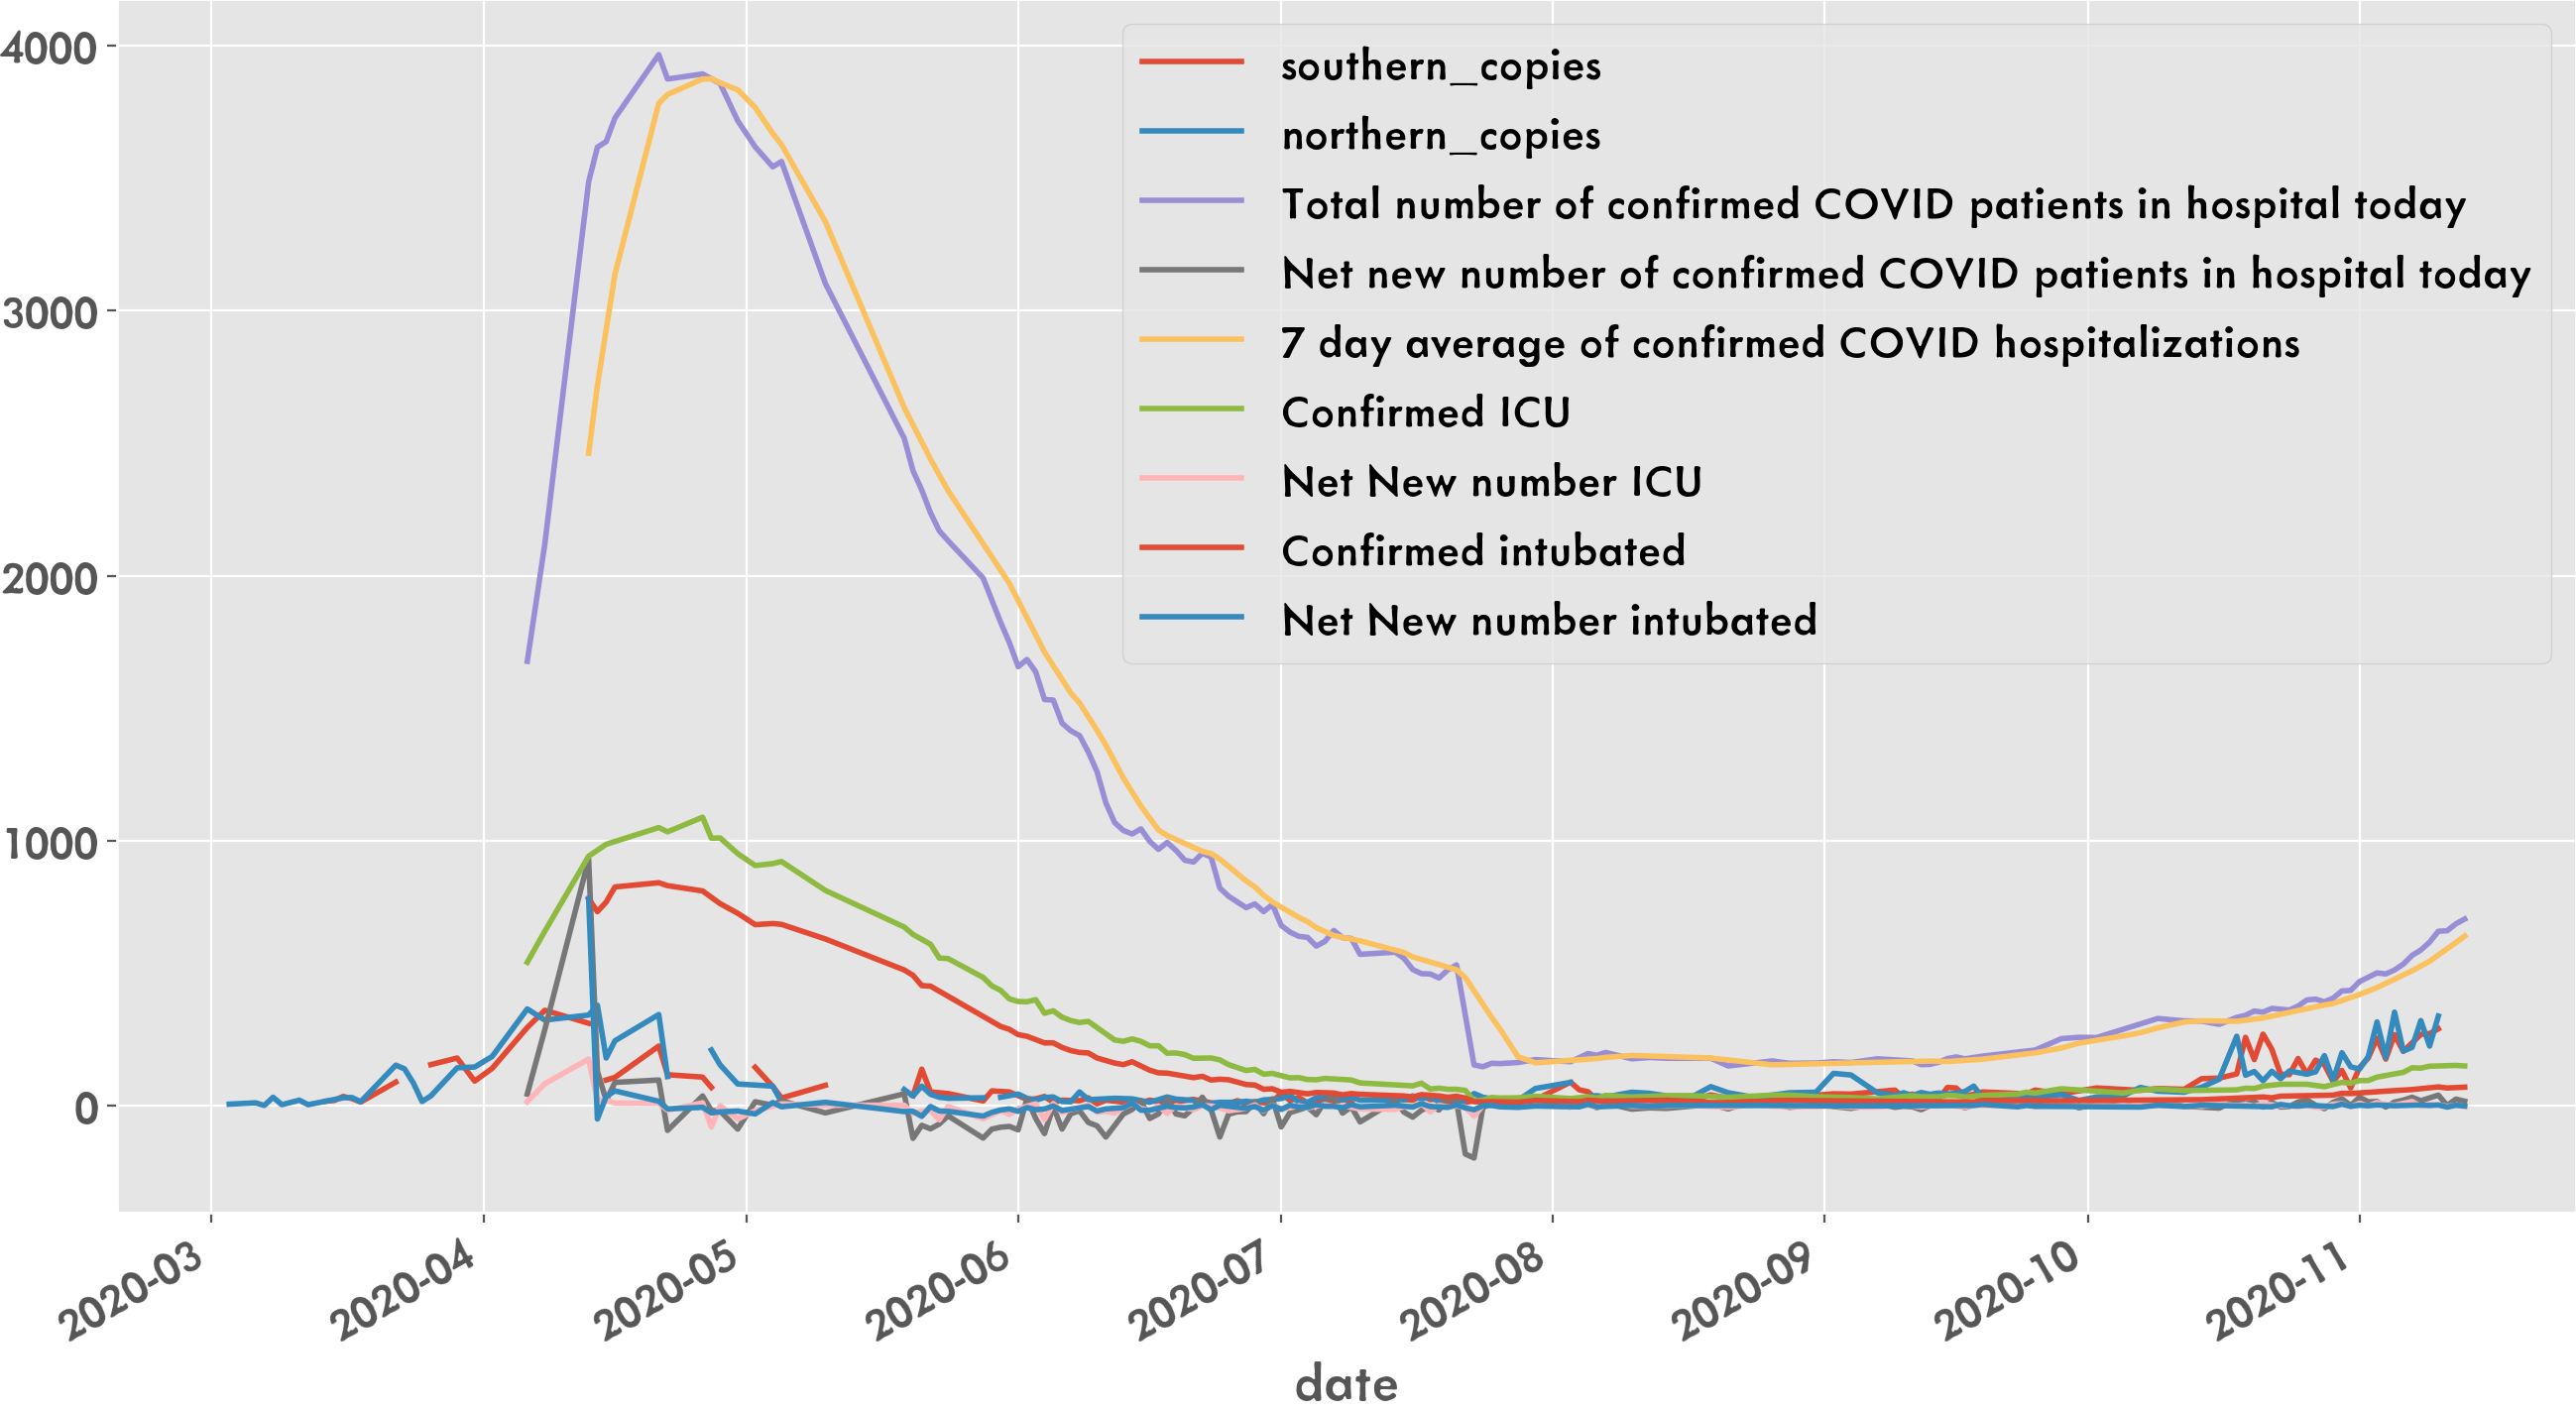

In [55]:
df_mega.plot()

Text(0.5, 1.0, 'MASSACHUSETTS WATER RESOURCES AUTHORITY\nVIRAL RNA LEVELS IN SEWAGE')

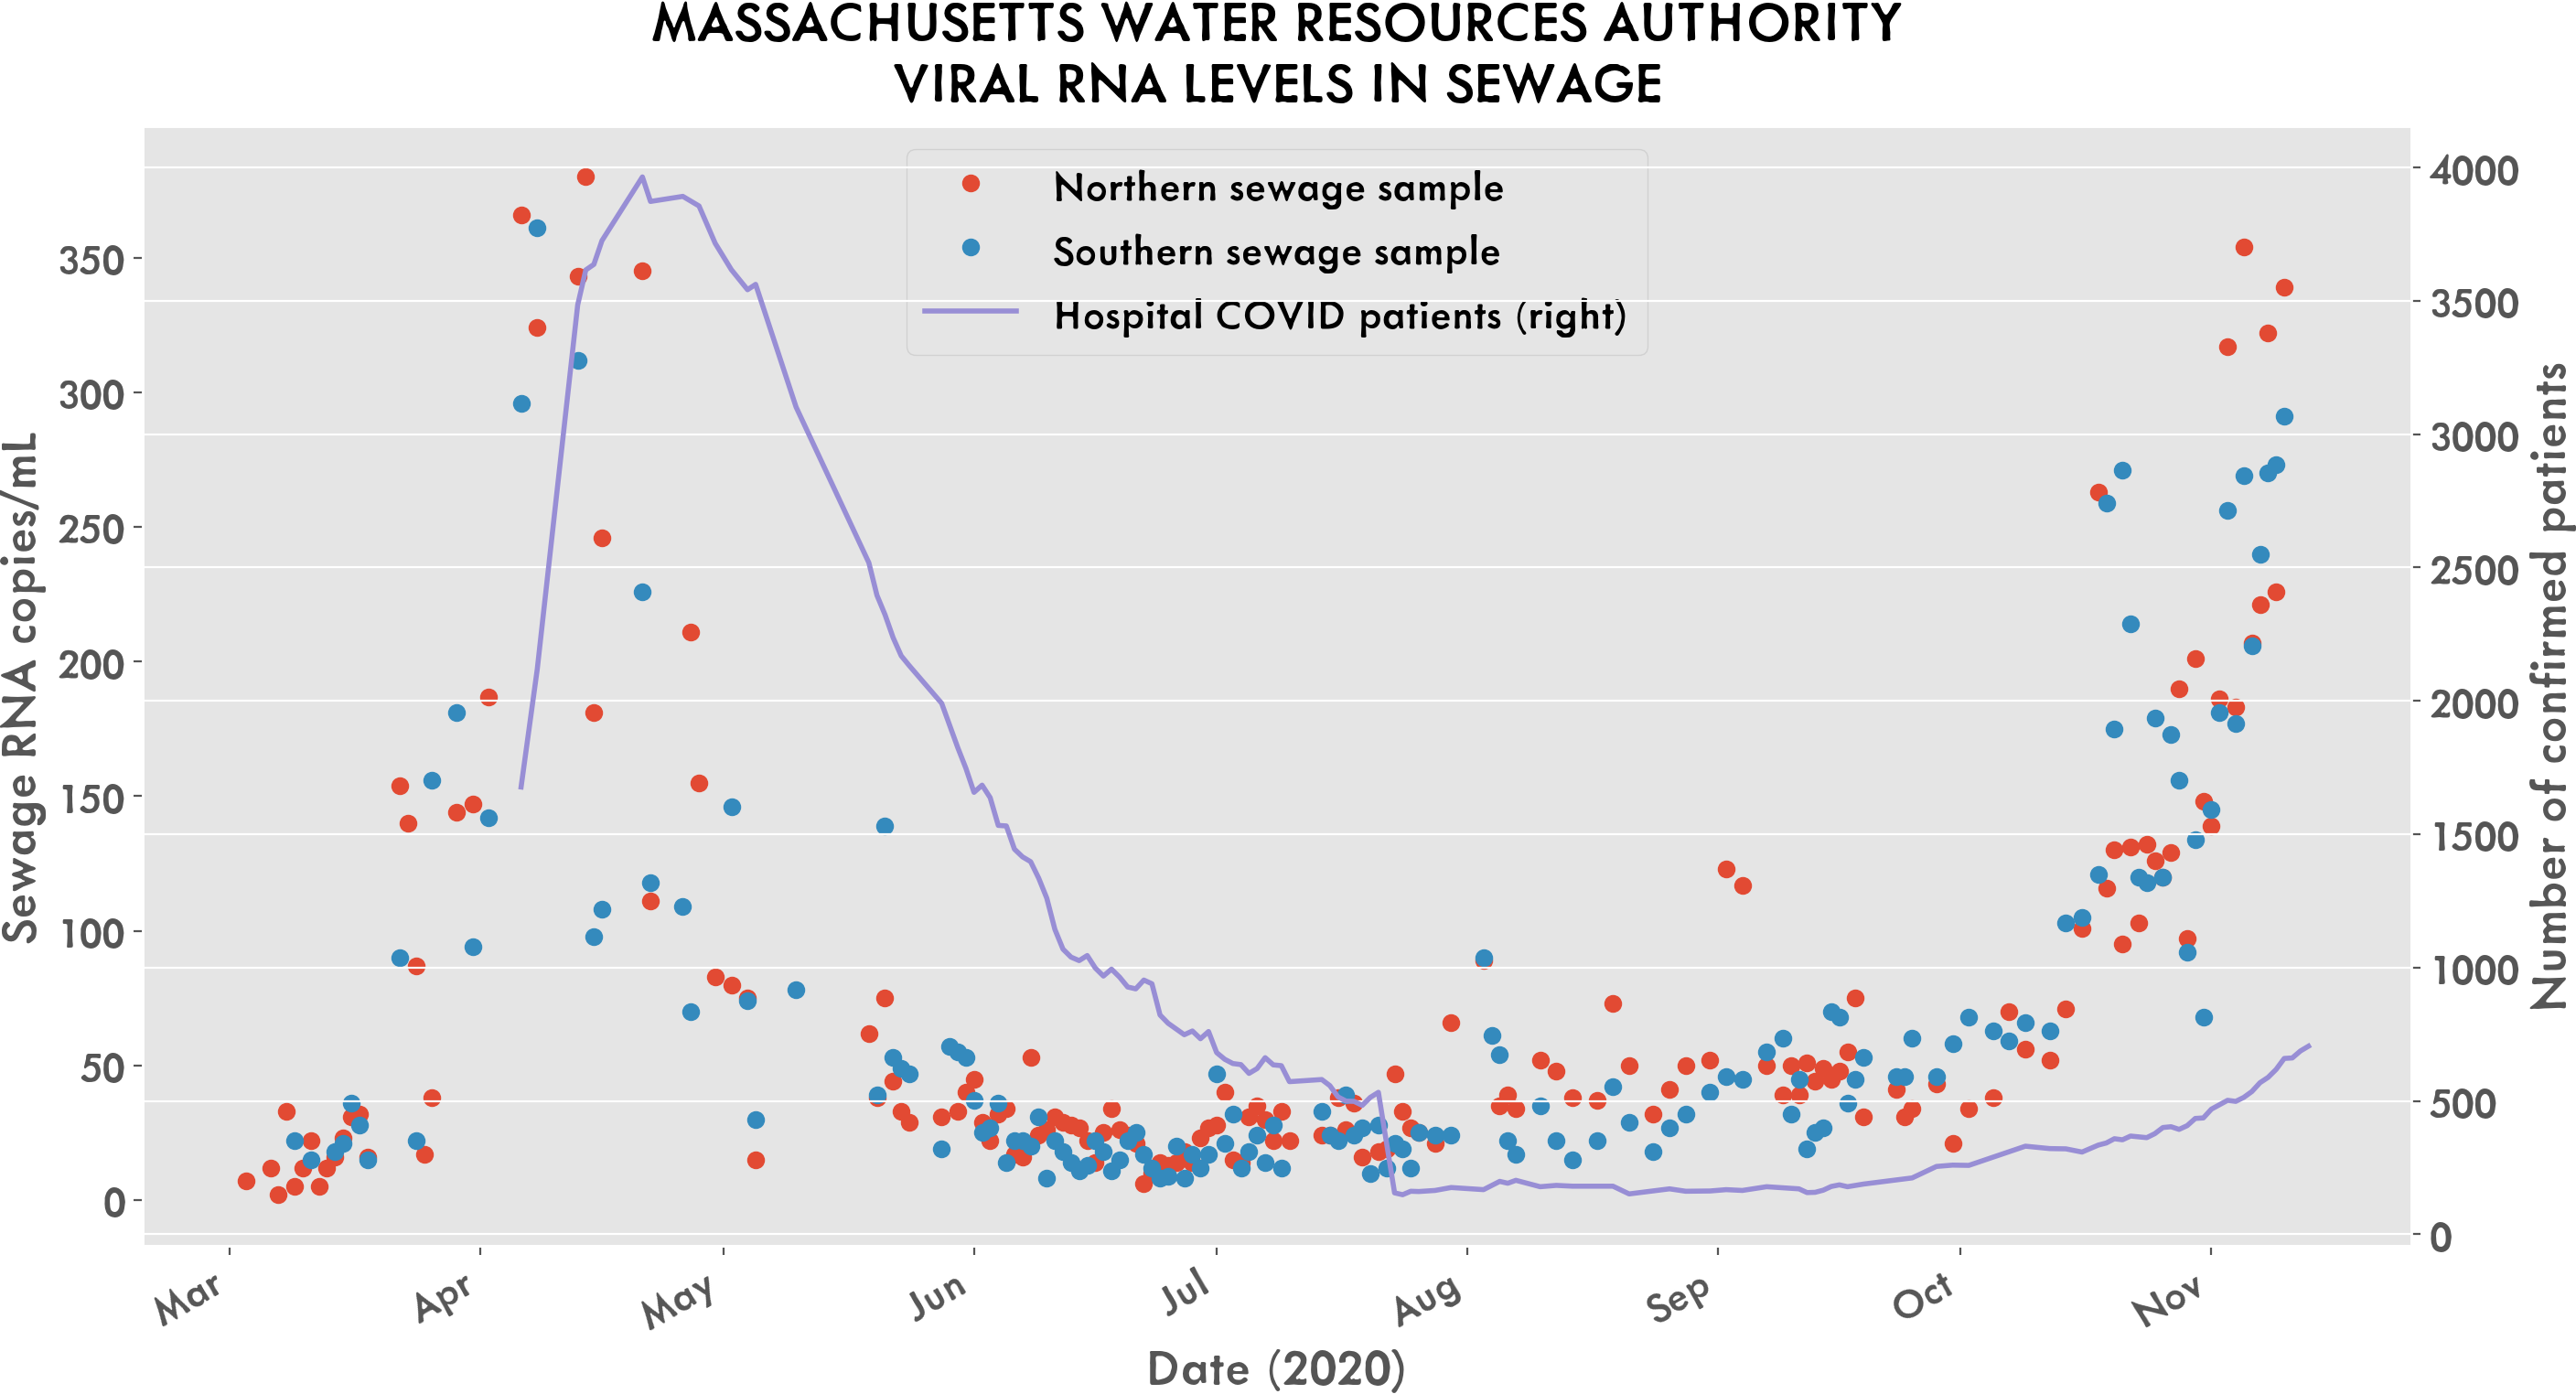

In [68]:
fig, ax = plt.subplots(figsize=(16,9))
df_mega.plot(ax=ax, y='northern_copies', label="Northern sewage sample", marker='o', ls='none')
df_mega.plot(ax=ax, y='southern_copies', label="Southern sewage sample", marker='o', ls='none')
ax2 = df_mega.plot(ax=ax, secondary_y=True, y='Total number of confirmed COVID patients in hospital today', label="Hospital COVID patients")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
ax.set_xlabel("Date (2020)")
ax.set_ylabel("Sewage RNA copies/mL")
ax2.set_ylabel("Number of confirmed patients")
#plt.legend(loc="upper center")
plt.title("Massachusetts Water Resources Authority\nViral RNA Levels in Sewage".upper())

In [69]:
fig.savefig('foo.png')